İhtiyacımız olan kütüphaneleri import ediyoruz.

In [19]:

import numpy as np
import pandas as pd

Veri setimizi "Lawsuit.csv" dosyasından yüklüyoruz ve görüntülüyoruz.

In [20]:
df = pd.read_csv("Lawsuit.csv") 
df

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...,...
256,257,6,0,1,1,2.9,8,2,297174,323699
257,258,6,0,1,1,2.6,9,3,308081,339664
258,259,6,0,1,1,2.8,8,1,211269,241577
259,260,6,0,1,1,2.4,2,1,210801,233905


Veri setimizin ilk birkaç satırını görüntülüyoruz.

In [21]:
df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099


Veri setimizin son birkaç satırını görüntülüyoruz.

In [22]:
df.tail()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
256,257,6,0,1,1,2.9,8,2,297174,323699
257,258,6,0,1,1,2.6,9,3,308081,339664
258,259,6,0,1,1,2.8,8,1,211269,241577
259,260,6,0,1,1,2.4,2,1,210801,233905
260,261,6,0,1,1,3.2,5,1,244551,265502


Veri setimizdeki sütunlar, veri tipleri ve eksik değerler hakkında genel bilgi alıyoruz.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      261 non-null    int64  
 1   Dept    261 non-null    int64  
 2   Gender  261 non-null    int64  
 3   Clin    261 non-null    int64  
 4   Cert    261 non-null    int64  
 5   Prate   261 non-null    float64
 6   Exper   261 non-null    int64  
 7   Rank    261 non-null    int64  
 8   Sal94   261 non-null    int64  
 9   Sal95   261 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 20.5 KB


Veri setimizde eksik değer olup olmadığını kontrol ediyoruz.

In [24]:
df.isnull().any()

ID        False
Dept      False
Gender    False
Clin      False
Cert      False
Prate     False
Exper     False
Rank      False
Sal94     False
Sal95     False
dtype: bool

Veri setimizin genel özelliklerini kolayca incelemek için bir fonksiyon oluşturuyoruz ve çalıştırıyoruz.

In [25]:
def check_df(dataframe, head=5):
    print('################### Shape ###################')
    print(dataframe.shape)
    print('################### Types ###################')
    print(dataframe.dtypes)
    print('################### NA ######################')
    print(dataframe.isnull().sum())
    print('################### Info ####################')
    print(dataframe.info())

check_df(df)

################### Shape ###################
(261, 10)
################### Types ###################
ID          int64
Dept        int64
Gender      int64
Clin        int64
Cert        int64
Prate     float64
Exper       int64
Rank        int64
Sal94       int64
Sal95       int64
dtype: object
################### NA ######################
ID        0
Dept      0
Gender    0
Clin      0
Cert      0
Prate     0
Exper     0
Rank      0
Sal94     0
Sal95     0
dtype: int64
################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      261 non-null    int64  
 1   Dept    261 non-null    int64  
 2   Gender  261 non-null    int64  
 3   Clin    261 non-null    int64  
 4   Cert    261 non-null    int64  
 5   Prate   261 non-null    float64
 6   Exper   261 non-null    int64  
 7   Rank    261 non-null    int64  
 8  

Verimizi daha anlaşılır hale getirmek için bazı sütunlardaki sayısal değerleri metin ile değiştiriyoruz.

In [26]:
df["Gender"] = df["Gender"].replace({1: 'Male', 0: 'Female'})
df["Dept"] = df["Dept"].replace({1: 'Biochemistry/Molecular Biology', 2: 'Physiology', 
                                 3: 'Genetics',4: 'Pediatrics', 5: 'Medicine', 6: 'Surgery'})

df["Clin"] = df["Clin"].replace({1: 'Primarily Clinical Emphasis', 0: 'Primarily Research Emphasis'})
df["Cert"] = df["Cert"].replace({1: 'Board certified', 0: 'Not certified'})
df["Rank"] = df["Rank"].replace({1: 'Assistant', 2: 'Associate', 3: 'Full Professor'})

df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.4,9,Full Professor,77836,84612
1,2,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,6.7,10,Associate,69994,78497
2,3,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,8.1,6,Assistant,62872,67756
3,4,Biochemistry/Molecular Biology,Male,Primarily Clinical Emphasis,Board certified,5.1,27,Full Professor,155196,173220
4,5,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.0,10,Full Professor,89268,96099


Veri setimizin sayısal sütunları hakkında temel istatistiksel bilgiler alıyoruz.

In [27]:
df.describe()

,ID,Prate,Exper,Sal94,Sal95
count,261.00000,261.000000,261.000000,261.000000,261.000000
mean,131.00000,4.932184,10.229885,153593.344828,168906.655172
std,75.48841,1.944430,6.227176,80469.666720,88778.425411
min,1.00000,1.300000,1.000000,34514.000000,38675.000000
25%,66.00000,3.200000,6.000000,90771.000000,99972.000000
50%,131.00000,4.400000,9.000000,133284.000000,148117.000000
75%,196.00000,6.900000,14.000000,200543.000000,218955.000000
max,261.00000,8.700000,37.000000,428876.000000,472589.000000


"Dept" ve "Rank" sütunlarındaki unique değerleri görüntülüyoruz.

In [28]:
df["Dept"].unique()

array(['Biochemistry/Molecular Biology', 'Physiology', 'Genetics',
       'Pediatrics', 'Medicine', 'Surgery'], dtype=object)

In [29]:
df["Rank"].unique()

array(['Full Professor', 'Associate', 'Assistant'], dtype=object)

"Gender" sütunundaki her bir değerin kaç kez tekrarlandığını sayıyoruz.

In [30]:
df["Gender"].value_counts()

Gender
Male      155
Female    106
Name: count, dtype: int64

Cinsiyete göre akademik statü dağılımını hesaplıyoruz.

In [31]:
#Cinsiyete göre akademik statü dağılımı

rank_gender_counts = df.pivot_table(index="Rank", columns="Gender", aggfunc="size", fill_value=0)
print(rank_gender_counts)

Gender          Female  Male
Rank                        
Assistant           69    43
Associate           21    43
Full Professor      16    69


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.4,9,Full Professor,77836,84612
1,2,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,6.7,10,Associate,69994,78497
2,3,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,8.1,6,Assistant,62872,67756
3,4,Biochemistry/Molecular Biology,Male,Primarily Clinical Emphasis,Board certified,5.1,27,Full Professor,155196,173220
4,5,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.0,10,Full Professor,89268,96099


Cinsiyet ve akademik unvan dağılımını görselleştiren bir bar grafiği oluşturuyoruz.

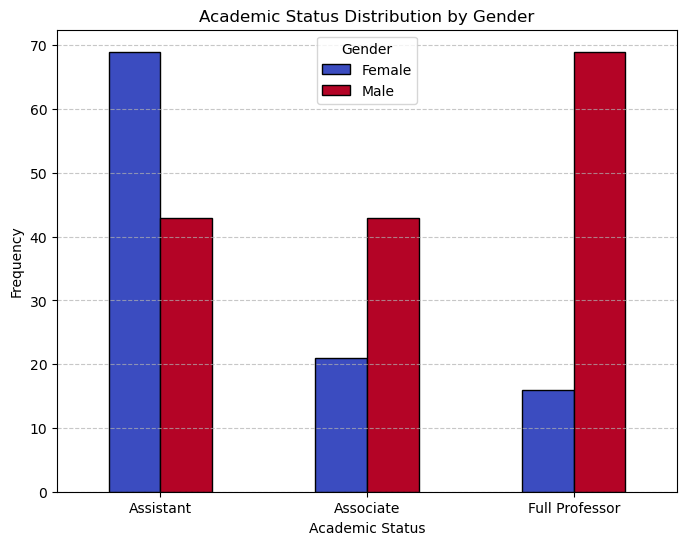

In [90]:
rank_gender_counts.plot(kind="bar", figsize=(8, 6), colormap="coolwarm", edgecolor="black")

plt.title("Academic Status Distribution by Gender")
plt.xlabel("Academic Status")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Cinsiyete göre ortalama maaşları hesaplıyoruz ve ardından cinsiyetlere göre maaş dağılımını gösteren bir kutu grafiği oluşturuyoruz.

In [73]:
salary_gender=df.groupby(["Gender"])[["Sal94"]].mean().reset_index()
salary_gender

,Gender,Sal94
0,Female,118871.273585
1,Male,177338.761290


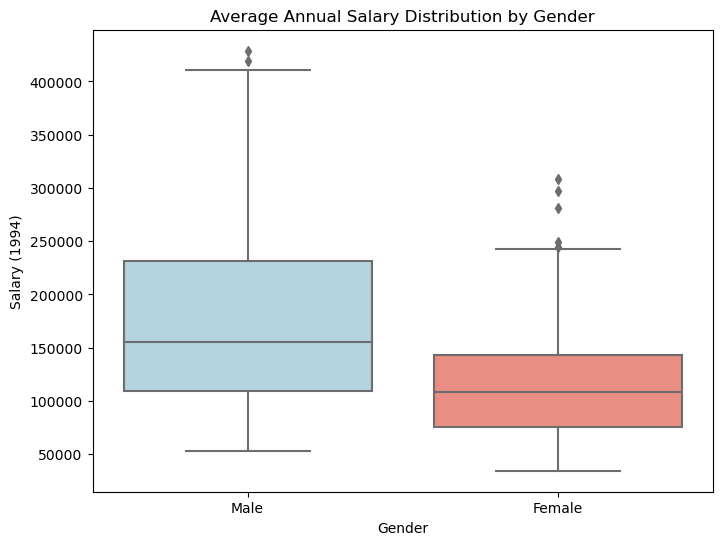

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Gender", y="Sal94", palette=["lightblue", "salmon"])
plt.title("Average Annual Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Salary (1994)")
plt.show()

Akademik unvana göre ortalama maaşları hesaplıyoruz ve ardından bu maaşları gösteren bir bar grafiği oluşturuyoruz.

In [82]:
average_salary_academic = df.groupby(["Rank"])[["Sal94"]].mean().reset_index()

average_salary_academic


,Rank,Sal94
0,Assistant,136109.580357
1,Associate,149544.093750
2,Full Professor,179679.623529


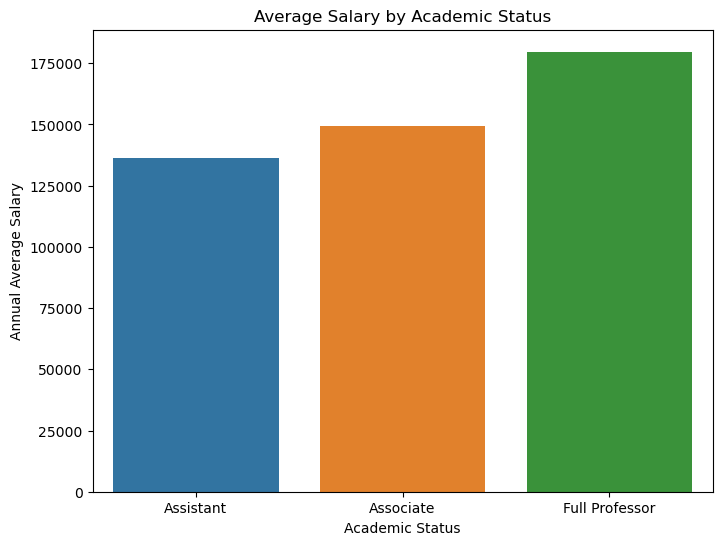

In [84]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.figure(figsize=(8, 6))
sns.barplot(x='Rank', y='Sal94', palette=colors, data= average_salary_academic )
plt.title('Average Salary by Academic Status')
plt.xlabel("Academic Status")
plt.ylabel("Annual Average Salary")
plt.show()

Akademik departmanlara göre ortalama maaşları hesaplıyoruz ve ardından bu maaşları gösteren bir bar grafiği oluşturuyoruz.

In [93]:
average_salary_dept = df.groupby(["Dept"])[["Sal94"]].mean().reset_index()

average_salary_dept

,Dept,Sal94
0,Biochemistry/Molecular Biology,94490.000000
1,Genetics,114766.047619
2,Medicine,180862.862500
3,Pediatrics,119377.066667
4,Physiology,83098.175000
5,Surgery,289475.200000


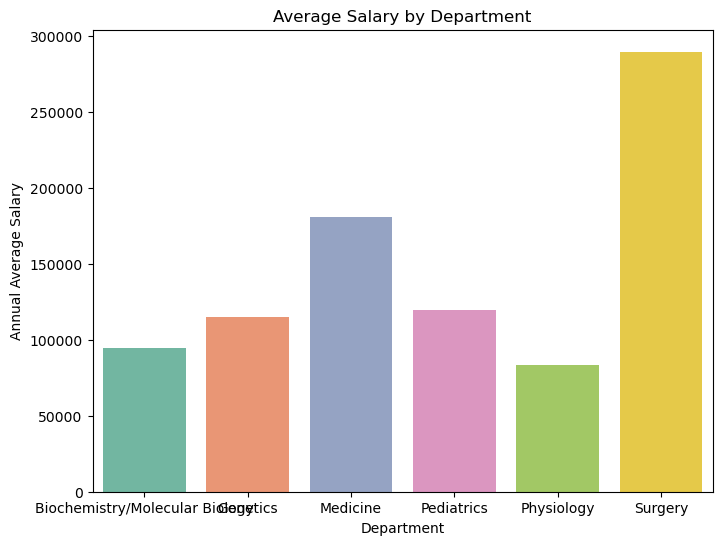

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Dept', y='Sal94', palette="Set2", data= average_salary_dept)
plt.title('Average Salary by Department')
plt.xlabel("Department")
plt.ylabel("Annual Average Salary")
plt.show()

En yüksek maaş Cerrahi departmanında görüldüğü için buradaki Kadın ve Erkek ortalama maaşları hesaplıyoruz, ardından boxplot ile görselleştiriyoruz. 

In [95]:
surgery_df = df[df["Dept"] == "Surgery"]

surgery_avg_salary= surgery_df.groupby(["Gender"])[["Sal94"]].mean().reset_index()

surgery_avg_salary


,Gender,Sal94
0,Female,254375.200000
1,Male,294489.485714


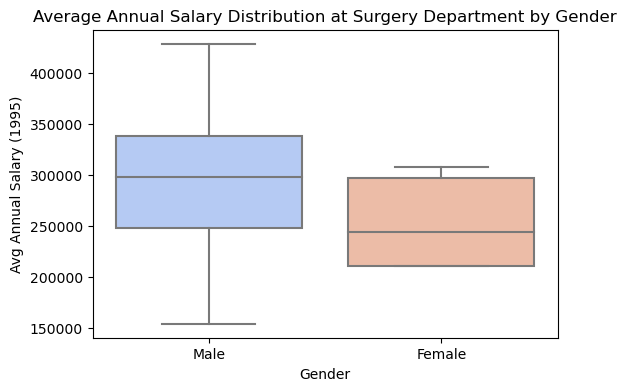

In [98]:
plt.figure(figsize=(6, 4))
sns.boxplot(data= surgery_df, x="Gender", y="Sal94", palette="coolwarm")
plt.title("Average Annual Salary Distribution at Surgery Department by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg Annual Salary (1995)")
plt.show()


Akademik unvan ve cinsiyete göre 1994 yılına ait ortalama maaşları hesaplıyoruz ve bu verileri gösteren bir bar grafiği oluşturuyoruz.

In [75]:
salary_rank_gender_94 = df.groupby(["Rank", "Gender"])[["Sal94"]].mean().reset_index()

salary_rank_gender_94

,Rank,Gender,Sal94
0,Assistant,Female,108811.782609
1,Assistant,Male,179913.023256
2,Associate,Female,121986.714286
3,Associate,Male,163002.348837
4,Full Professor,Female,158163.812500
5,Full Professor,Male,184668.797101


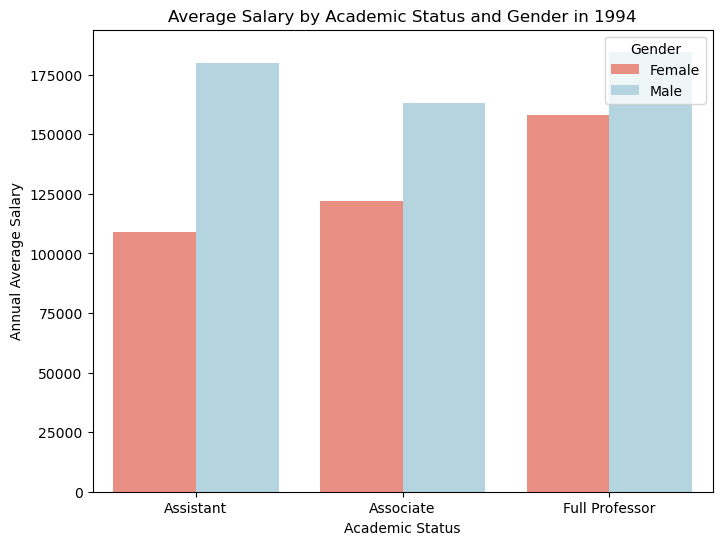

In [85]:
plt.figure(figsize=(8, 6))
sns.barplot( x = "Rank", y = "Sal94",hue = "Gender",data = salary_rank_gender_94, palette=["salmon", "lightblue"])
plt.title('Average Salary by Academic Status and Gender in 1994')
plt.xlabel("Academic Status")
plt.ylabel("Annual Average Salary")
plt.show()

Akademik unvan ve cinsiyete göre 1995 yılına ait ortalama maaşları hesaplıyoruz ve bu verileri gösteren bir bar grafiği oluşturuyoruz. 

In [74]:
salary_rank_gender_95 = df.groupby(["Rank", "Gender"])[["Sal95"]].mean().reset_index()

salary_rank_gender_95

,Rank,Gender,Sal95
0,Assistant,Female,119795.101449
1,Assistant,Male,197836.325581
2,Associate,Female,134446.476190
3,Associate,Male,179115.348837
4,Full Professor,Female,173982.187500
5,Full Professor,Male,202938.579710


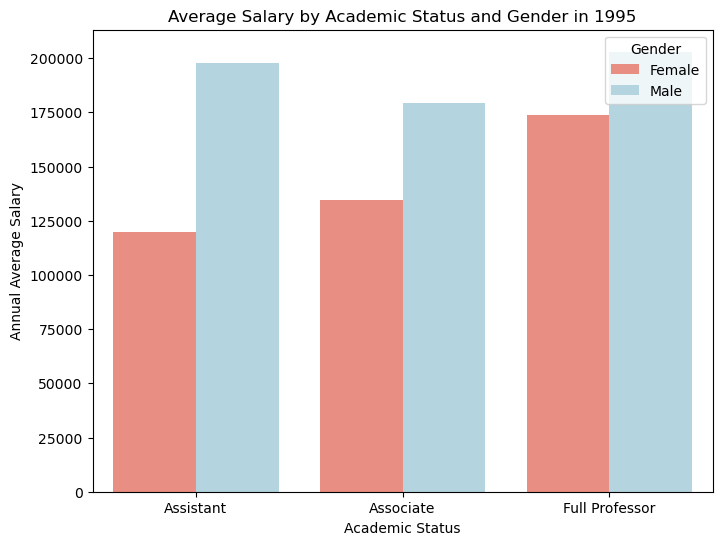

In [86]:
plt.figure(figsize=(8, 6))
sns.barplot( x = "Rank", y = "Sal95",hue = "Gender",data = salary_rank_gender_95, palette=["salmon", "lightblue"])
plt.title('Average Salary by Academic Status and Gender in 1995')
plt.xlabel("Academic Status")
plt.ylabel("Annual Average Salary")
plt.show()

1 yıl içerisindeki maaş zammını hesaplıyoruz.

In [68]:
#1 yıl içerisindeki maaş zammı

df["Promotion"] = df["Sal95"] - df["Sal94"] 

df.head()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,Promotion
0,1,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.4,9,Full Professor,77836,84612,6776
1,2,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,6.7,10,Associate,69994,78497,8503
2,3,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,8.1,6,Assistant,62872,67756,4884
3,4,Biochemistry/Molecular Biology,Male,Primarily Clinical Emphasis,Board certified,5.1,27,Full Professor,155196,173220,18024
4,5,Biochemistry/Molecular Biology,Male,Primarily Research Emphasis,Not certified,7.0,10,Full Professor,89268,96099,6831


1 yıllık ortalama maaş zammının cinsiyete göre dağılımını hesaplıyoruz ve kutu grafiği oluşturuyoruz.

In [87]:
#1 yıllık ortalama maaş zammı cinsiyete göre dağılımı

average_promotion_gender = df.groupby(["Gender"])[["Promotion"]].mean().reset_index()

average_promotion_gender

,Gender,Promotion
0,Female,12005.641509
1,Male,17575.329032


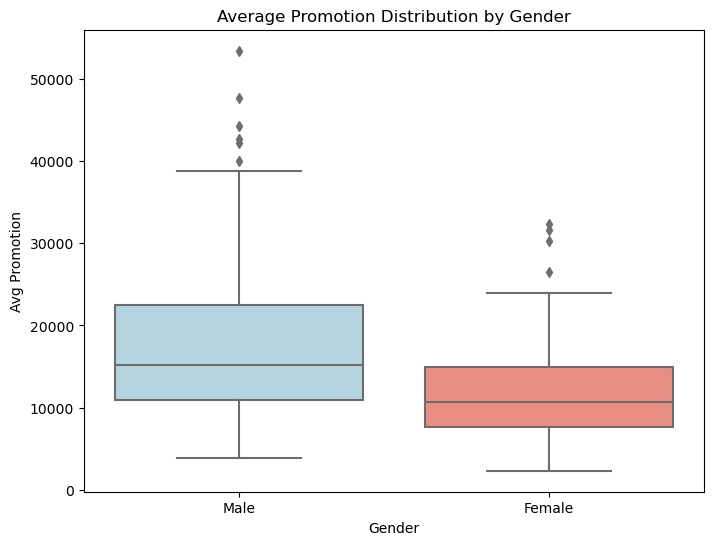

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Gender", y="Promotion", palette=["lightblue", "salmon"])
plt.title("Average Promotion Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg Promotion")
plt.show()

Sayısal sütunlar arasındaki korelasyonları hesaplıyoruz. Bu, verimizdeki değişkenlerin birbirleriyle ne kadar ilişkili olduğunu gösteriyor.

In [42]:
numeric_df=df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,ID,Prate,Exper,Sal94,Sal95
ID,1.000000,-0.817686,-0.154826,0.746931,0.748281
Prate,-0.817686,1.000000,0.111960,-0.712226,-0.713712
Exper,-0.154826,0.111960,1.000000,0.319804,0.318934
Sal94,0.746931,-0.712226,0.319804,1.000000,0.999255
Sal95,0.748281,-0.713712,0.318934,0.999255,1.000000


Sayısal veriler için histogramları görselleştirecek bir fonksiyon başlatıyoruz.

In [43]:
def hist_impression(numeric_df):
    plt.figure(figsize=(20,10))

"Prate" sütununu kullanarak, yayınlama oranı için bir histogram çiziyoruz. Ayrıca, verinin dağılımını daha iyi anlamak için Kernel Density Estimation (KDE) çizgisi ekliyoruz.

Text(0.5, 1.0, 'Avarage Publication Rate')

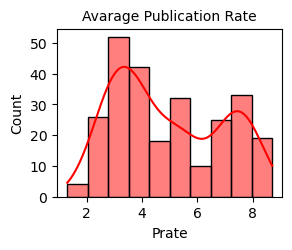

In [58]:
plt.subplot(2,2,1)
sns.histplot(data=numeric_df, x='Prate', color='red', kde=True)
plt.title('Avarage Publication Rate',size=10)

"Exper" sütununu kullanarak, MD (Tıp Doktoru) alma süresi için bir histogram çiziyoruz.

Text(0.5, 1.0, 'Years Since Obtaining MD')

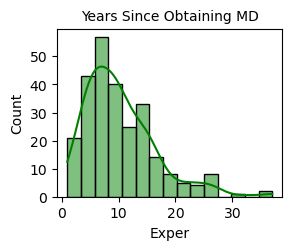

In [45]:
plt.subplot(2,2,1)
sns.histplot(data=numeric_df, x='Exper', color='green', kde=True)
plt.title('Years Since Obtaining MD',size=10)

1994 akademik yılına ait maaş verilerini kullanarak bir histogram çiziyoruz. 

Text(0.5, 1.0, 'Salary In Academic Year 1994')

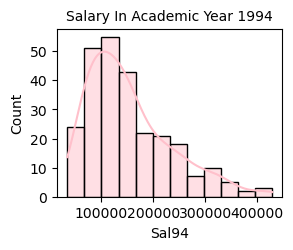

In [46]:
plt.subplot(2,2,1)
sns.histplot(data=numeric_df, x='Sal94', color='pink', kde=True)
plt.title('Salary In Academic Year 1994',size=10)

1995 yılına ait maaş verilerini kullanarak bir histogram çiziyoruz. Bu, 1994 yılına yapılan artışı gösteriyor.

Text(0.5, 1.0, 'Salary After Increment to 1994')

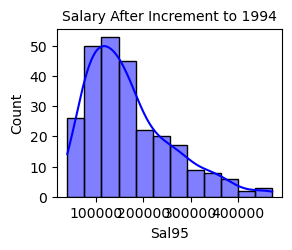

In [47]:
plt.subplot(2,2,1)
sns.histplot(data=numeric_df, x='Sal95', color='blue', kde=True)
plt.title('Salary After Increment to 1994',size=10)

Kadın ve Erkeklerin deneyim yılı farkı istatistiksel olarak anlamlı olup olmadığına bakıyoruz.

In [77]:
import scipy.stats as stats

In [78]:
# Kadın ve erkeklerin deneyim yılı farkı istatistiksel olarak anlamlı mı?
female_experience = df[df["Gender"] == "Female"]["Exper"]
male_experience = df[df["Gender"] == "Male"]["Exper"]

t_stat, p_value = stats.ttest_ind(female_experience, male_experience, equal_var=False)
print(f"T-Test Sonucu: t-statistic={t_stat}, p-value={p_value}")


T-Test Sonucu: t-statistic=-6.8483232624066455, p-value=5.489109481999278e-11


Doktorların elde ettikleri tecrübe/deneyim yılının da cinsiyetler arasında istatiksel açıdan önemli bir fark olduğunu gösteriyor.

Deneyim ettikleri yıl sayısı ile yıllık ortalama maaşlarının ilişkisini göstermek ve cinsiyete bağlı bir farklılığın görülebilmesi için dağılım grafiği kullanıldı. 

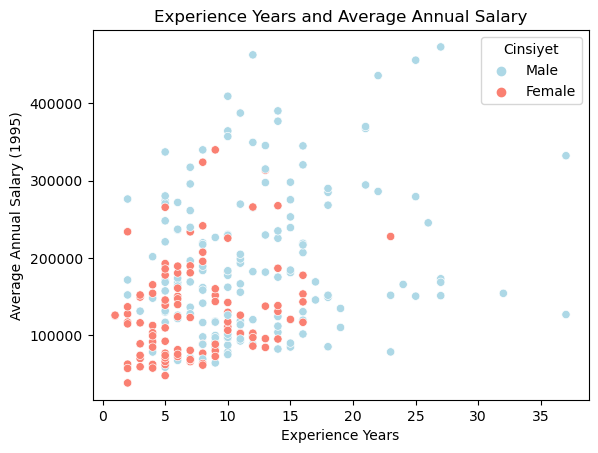

In [80]:
sns.scatterplot(data=df, x="Exper", y="Sal95", hue="Gender", palette=["lightblue", "salmon"])
plt.title("Experience Years and Average Annual Salary")
plt.xlabel("Experience Years")
plt.ylabel("Average Annual Salary (1995)")
plt.legend(title="Cinsiyet")
plt.show()
